<a href="https://colab.research.google.com/github/CyberBantu/Complemento-Analise-do-ISP-DM/blob/main/Complemento_analise_ISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import basedosdados as bd
import matplotlib.pyplot as plt
import seaborn as sns
df = bd.read_table(dataset_id='br_isp_estatisticas_seguranca',
table_id='taxa_evolucao_anual_municipio',
billing_project_id="analise-1746")

Downloading: 100%|██████████| 644/644 [00:00<00:00, 1517.35rows/s]


#### Explorando os dados

In [ ]:
df.head()

,ano,id_municipio,municipio,regiao_rj,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,2014,3300100,angra dos reis,interior,40.55,0.00,0.54,41.09,1.08,42.18,...,87.60,2.16,510.44,49.75,4.33,0.00,0.00,0.0,3256.19,3.0
1,2015,3300100,angra dos reis,interior,48.86,0.00,0.00,48.86,6.90,55.77,...,77.55,3.19,477.49,39.30,1.59,0.00,0.00,0.0,3037.56,3.0
2,2016,3300100,angra dos reis,interior,44.39,0.52,0.52,45.43,3.66,49.09,...,65.27,7.31,341.51,40.21,4.70,0.00,0.00,0.0,2858.43,3.0
3,2017,3300100,angra dos reis,interior,44.70,0.00,0.00,44.70,13.36,58.06,...,101.22,2.57,230.71,27.75,3.08,0.51,0.00,0.0,2321.97,3.0
4,2018,3300100,angra dos reis,interior,65.87,0.00,0.50,66.36,25.45,91.81,...,84.33,6.49,221.05,25.95,5.99,0.50,2.22,0.0,2292.83,3.0


In [ ]:
df['regiao_rj'].unique()

array(['interior', 'baixada fluminense', 'grande niteroi', 'capital'],
      dtype=object)

In [ ]:
# Filtrando os dados para baixada
baixada = df.query("regiao_rj == 'baixada fluminense'")

In [ ]:
baixada.head()

,ano,id_municipio,municipio,regiao_rj,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
56,2014,3300456,belford roxo,baixada fluminense,48.40,0.00,0.63,49.02,13.35,62.37,...,96.37,1.88,366.09,30.87,3.34,0.21,0.00,0.0,2936.05,3.0
57,2015,3300456,belford roxo,baixada fluminense,35.96,0.21,0.42,36.58,9.77,46.35,...,99.97,1.25,282.25,29.51,1.04,0.21,0.00,0.0,2638.80,3.0
58,2016,3300456,belford roxo,baixada fluminense,41.89,0.00,0.61,42.50,10.73,53.22,...,94.31,2.43,249.52,28.33,1.42,0.20,6.51,0.0,2850.60,3.0
59,2017,3300456,belford roxo,baixada fluminense,52.04,0.40,1.61,54.06,6.25,60.31,...,114.97,3.63,209.97,27.83,1.21,0.00,2.15,0.0,2802.03,3.0
60,2018,3300456,belford roxo,baixada fluminense,41.68,0.20,2.75,44.63,18.28,62.92,...,85.33,3.74,240.26,29.89,0.59,0.00,2.22,0.0,3301.13,3.0


In [ ]:
baixada['ano'].unique()

<IntegerArray>
[2014, 2015, 2016, 2017, 2018, 2019, 2020]
Length: 7, dtype: Int64

##### Olhando para a taxa de Policiais mortos em serviço na Baixada

In [ ]:
pol_mortos_ano = baixada[['ano','pol_militares_mortos_serv','municipio']]
pol_mortos_ano

,ano,pol_militares_mortos_serv,municipio
56,2014,0.00,belford roxo
57,2015,0.00,belford roxo
58,2016,6.51,belford roxo
59,2017,2.15,belford roxo
60,2018,2.22,belford roxo
...,...,...,...
569,2016,0.00,seropedica
570,2017,0.00,seropedica
571,2018,0.00,seropedica
572,2019,0.00,seropedica


In [ ]:
pol_mortos_ano = pol_mortos_ano.groupby(['ano']).mean()

In [ ]:
pol_mortos_ano = pol_mortos_ano.reset_index()

In [ ]:
pol_mortos_ano

,ano,pol_militares_mortos_serv
0,2014,0.000000
1,2015,0.318462
2,2016,0.834615
3,2017,1.321538
4,2018,1.024615
5,2019,0.521538
6,2020,0.521538


In [ ]:
pol_mortos_ano.columns

Index(['ano', 'pol_militares_mortos_serv'], dtype='object')

* Grafico de Taxa de Homicídios de Políciais Militares na Baixada

Text(0.5, 1.0, 'Taxa de PMs Mortos a Cada 100 Mil Habitantes entre 2014 e 2020 na Baixada Fluminense')

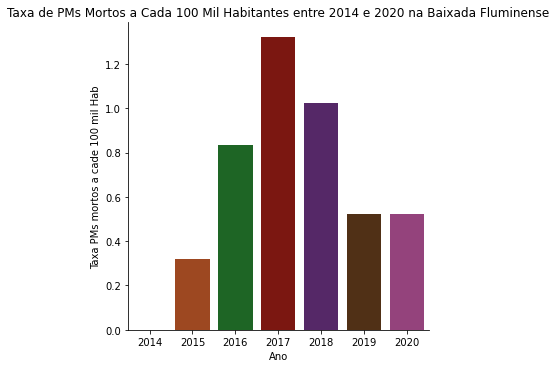

In [ ]:
ax = sns.catplot(data = pol_mortos_ano,
            x = 'ano', y = 'pol_militares_mortos_serv',
            kind = 'bar', palette='dark')
plt.xlabel('Ano')
plt.ylabel('Taxa PMs mortos a cade 100 mil Hab')
plt.title('Taxa de PMs Mortos a Cada 100 Mil Habitantes entre 2014 e 2020 na Baixada Fluminense')

* Na Baixada Fluminense os anos entre 2016 e 2018 foram os que mais ouveram mortes de policiais militares na Baixada Fluminense

* **Analisando letalidade por Municípios da Baixada**

In [ ]:
pol_mortos_municipio = pol_mortos_ano.groupby(['municipio'])['pol_militares_mortos_serv'].mean().reset_index().sort_values(by = 'pol_militares_mortos_serv',
                                                                                                                           ascending = False)
pol_mortos_municipio

,municipio,pol_militares_mortos_serv
1,duque de caxias,2.167143
0,belford roxo,1.877143
11,sao joao de meriti,0.950000
10,queimados,0.947143
8,nova iguacu,0.922857
3,itaguai,0.640000
4,japeri,0.624286
5,mage,0.307143
2,guapimirim,0.000000
6,mesquita,0.000000


* Grafico de Munícipios com maiores letalidades de Policiais Militares na Baixada entre 2014 e 2020

Text(0.5, 1.0, 'Taxa Média de PMs Mortos em Serviço a Cada 100 Mil Habitantes nos Municípios da Baixada Fluminense\nentre 2014 e 2020')

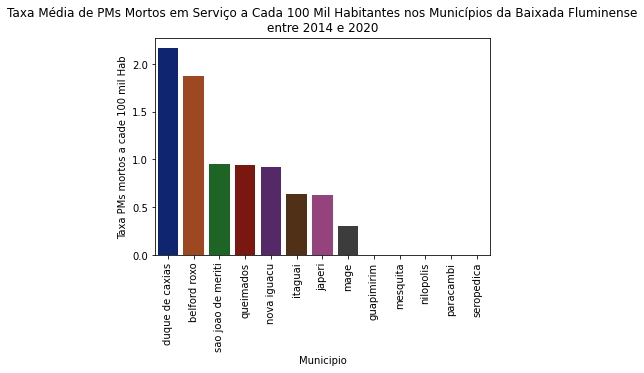

In [ ]:
sns.barplot(data = pol_mortos_municipio, x = 'municipio', y = 'pol_militares_mortos_serv', palette = 'dark')
plt.xticks(rotation = 90)
plt.xlabel('Municipio')
plt.ylabel('Taxa PMs mortos a cade 100 mil Hab')
plt.title('Taxa Média de PMs Mortos em Serviço a Cada 100 Mil Habitantes nos Municípios da Baixada Fluminense\nentre 2014 e 2020')

* Duque de Caxias e Belford Roxo Lideram o Ranking de Municípios com Maior Letalidade de Policiais Militares Mortos em Serviço

##### Mortes por Intervensão do Estado na Baixada Fluminense

In [ ]:
hom_int_policial = baixada[['ano','municipio','hom_por_interv_policial']]
hom_int_policial

,ano,municipio,hom_por_interv_policial
56,2014,belford roxo,13.35
57,2015,belford roxo,9.77
58,2016,belford roxo,10.73
59,2017,belford roxo,6.25
60,2018,belford roxo,18.28
...,...,...,...
569,2016,seropedica,0.00
570,2017,seropedica,1.18
571,2018,seropedica,3.46
572,2019,seropedica,2.43


In [ ]:
hom_int_policial_ano = hom_int_policial.groupby(['ano'])['hom_por_interv_policial'].mean().reset_index()
hom_int_policial_ano

,ano,hom_por_interv_policial
0,2014,3.706154
1,2015,2.977692
2,2016,3.940000
3,2017,7.934615
4,2018,14.550769
5,2019,14.423077
6,2020,10.741538


A linha que corta os pontos é a linha de tendência, Observando os dados de Anos Anteriores


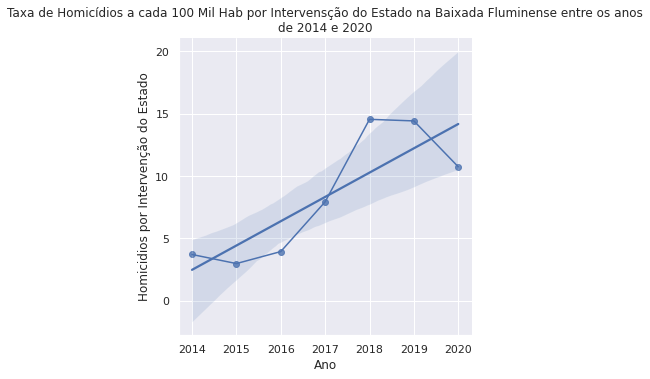

In [ ]:
sns.lmplot(data=hom_int_policial_ano,
           x="ano", y="hom_por_interv_policial",
               palette='dark')
sns.lineplot(data = hom_int_policial_ano, x = 'ano',
             y= 'hom_por_interv_policial', palette = 'dark')
plt.xlabel('Ano')
plt.ylabel('Homicidios por Intervenção do Estado')
plt.title('Taxa de Homicídios a cada 100 Mil Hab por Intervensção do Estado na Baixada Fluminense entre os anos\nde 2014 e 2020')
sns.set_theme(style = 'darkgrid')
print('A linha que corta os pontos é a linha de tendência, Observando os dados de Anos Anteriores')

* Na Baixada Fluminense nos mesmos anos que houve um aumento de casos de Homicídios de Políciais Militares **o numero de Homicídios por Intervenção do Estado tambem Aumentaram**